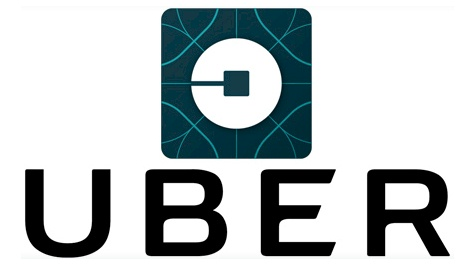

### INTRODUCTION

**Uber Technologies, Inc.** (Uber) is an American mobility as a service provider. It is based in San Francisco with operations in approximately 72 countries and 10,500 cities. Its services include: **ride-hailing**, **food delivery (Uber Eats and Postmates)**, **package delivery**, **couriers**, **freight transportation**, **electric bicycle** and **motorized scooter rental via a partnership with Lime,** and **ferry transport in partnership with local operators.** Uber does not own any vehicles; instead, it receives a commission from each booking. Fares are quoted to the customer in advance but vary using a dynamic pricing model based on the local supply and demand at the time of the booking.

**The aim of this analysis is to identify the root cause of the problem (i.e. cancellation and non-availability of cars) and recommend ways to improve the situation.**

 **Note: For this analysis, only the trips to and from the airport are being considered.**

**There are six attributes associated with each request made by a customer:**

- Request id: A unique identifier of the request
- Pick-up point: The point from which the request was made
- Driver id: The unique identification number of the driver
- Status of the request: The final status of the trip, can be either completed, canceled by the driver or no cars are available
- Time of request: The date and time at which the customer made the trip request
- Drop-off time: The drop-off date and time, in case the trip was completed 

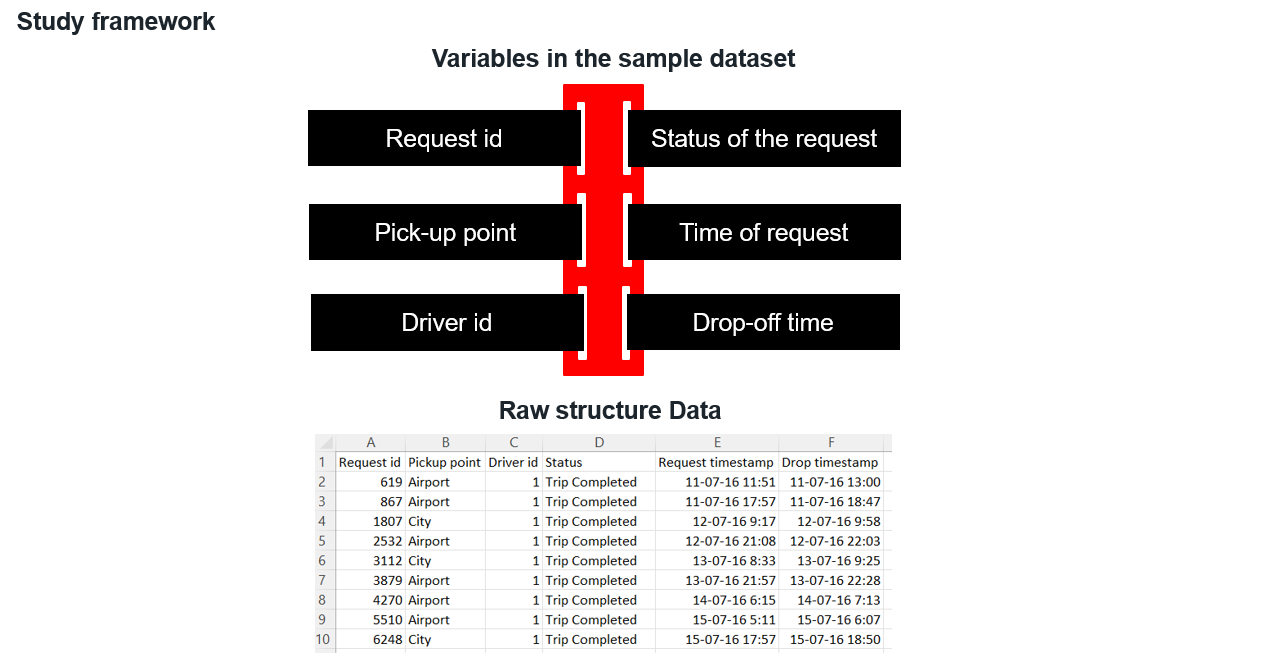

### HYPOTHESIS & BUSINESS PROBLEM:

- There is a statistically significant relationship between 'Status' and 'Pickup point’.
- There is a statistically significant association between ‘Status’ and ‘Request_day’
- There is a statistically significant correlation between ‘Status’ and ‘Request_hour’.
- There is a statistically significant relationship between 'Status' and ‘Month’.
- There is a statistically significant correlation between ‘Month’ and ‘Request_hour’.


### METHODOLOGY

**My methodology is described through the following steps:**

-   Drilling all features and their distribution.
-   Exploring the relations between variables.
-   Verifying the stated hypotheses.

### TO

-   Identify the most pressing problems for Uber.
-   Find out the gap between supply and demand.
-   Find the types of requests (city-airport or airport-city) for which the gap is the most severe in the identified time slots.
-   Recommend some ways to resolve the supply-demand gap.


### IMPORTING LIBRARIES

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the numpy and pandas package
import numpy as np # linear algebra
import pandas as pd # data processing, file I/O

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### IMPORTING DATA with CSV FORMAT

In [3]:
# loading csv data to dataframe 
df= pd.read_csv('Data/Uber Request Data.csv')

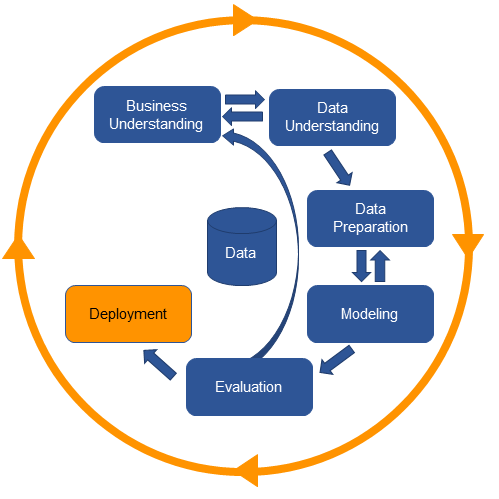

# EDA(Exploratory Data Analysis)

### Getting fimiliar with data


In [4]:
#shape of data
df.shape

(6745, 6)

In [5]:
# Checking the head of the dataset
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


In [6]:
# Checking the tail of the dataset
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN
6744,6753,Airport,NaN,No Cars Available,15-07-2016 23:55:03,NaN


In [7]:
#checking  number of obs and columns ,index of columns, name of columns, number of non_null values and datatype, (memory usage,...)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


### DATA PREPARATION

**DATA CLEANING:**

- 1) Handling Duplicate Data
- 2) Handling Missing Values
- 3) Handling Outliers
- 4)Standardising Values
- 5)Fixing Invalid Values and Filter Data

### HANDLING DUPLICATE VALUES

In [8]:
# getting copy of data ( copy by values)
df_orginal=df.copy()

In [9]:
df_nodub=df.drop_duplicates()

print(df.shape,df_nodub.shape,'\n Number of duplicate data : ',df.shape[0]-df_nodub.shape[0])

(6745, 6) (6745, 6) 
 Number of duplicate data :  0


**NOTE: We don't have any duplicated data and all observations are unique.**

### MISSING VALUES

In [10]:
#calculatin no. of missing values for each column and it's percentage
def percentage_of_miss():
    df1=df[df.columns[df.isnull().sum()>=1]]
    total_miss = df1.isnull().sum().sort_values(ascending=False)
    percent_miss = (df1.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)
    missing_data = pd.concat([total_miss, percent_miss], axis=1, keys=['Number of Missing', 'Percentage'])
    return(missing_data)

In [11]:
percentage_of_miss()

,Number of Missing,Percentage
Drop timestamp,3914,58.028169
Driver id,2650,39.288362


In [12]:
#Getting data type of varibles
df.dtypes

Request id             int64
Pickup point          object
Driver id            float64
Status                object
Request timestamp     object
Drop timestamp        object
dtype: object

In [13]:
df.head(10)

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
5,3879,Airport,1.0,Trip Completed,13-07-2016 21:57:28,13-07-2016 22:28:59
6,4270,Airport,1.0,Trip Completed,14-07-2016 06:15:32,14-07-2016 07:13:15
7,5510,Airport,1.0,Trip Completed,15-07-2016 05:11:52,15-07-2016 06:07:52
8,6248,City,1.0,Trip Completed,15-07-2016 17:57:27,15-07-2016 18:50:51
9,267,City,2.0,Trip Completed,11/7/2016 6:46,11/7/2016 7:25


**NOTE:** Columns **Request timestamp** and **Drop timestamp** are not time types and have a string type. It also does not have the same format.

Hence I will convert them to a **standard time format.**


### Standardization of timestamp data by converting them to datetime

In [14]:
df1=df.copy()

In [15]:
df2=df1.copy()

In [16]:
df['Drop timestamp']=df['Drop timestamp'].apply(lambda x: pd.to_datetime(x))
df['Request timestamp']=df['Request timestamp'].apply(lambda x: pd.to_datetime(x))

#### Also for further analysis, it is better to calculate the month, day of the week, and hour from the Request timestamp date. Thus:

### Calculate the day of the week, month, year, and the hour of the trip request

In [17]:
df['Request_day']=df['Request timestamp'].apply(lambda x: x.day_name())
df['Request_hour']=df['Request timestamp'].apply(lambda x: x.hour)
df["month"]=df["Request timestamp"].apply(lambda x: x.month)
df["year"]=df["Request timestamp"].apply(lambda x: x.year)

### Calculate the time between Request  and Drop in completed trips in seconds

In [18]:
def f(x):
    try:
        return abs(x['Request timestamp']-x['Drop timestamp']).seconds
    except:
        return 0

df["trip_time"]= df.apply(lambda x: f(x) , axis=1)

In [19]:
# Checking the head of new dataset
df.head()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour,month,year,trip_time
0,619,Airport,1.0,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11,11,2016,4140
1,867,Airport,1.0,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17,11,2016,3000
2,1807,City,1.0,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9,12,2016,2460
3,2532,Airport,1.0,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21,12,2016,3300
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,7,2016,3151


In [20]:
# Checking the tail of new dataset
df.tail()

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour,month,year,trip_time
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,Friday,23,7,2016,0
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,Friday,23,7,2016,0
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,Friday,23,7,2016,0
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,Friday,23,7,2016,0
6744,6753,Airport,NaN,No Cars Available,2016-07-15 23:55:03,NaT,Friday,23,7,2016,0


### UNIVARIATE ANALYSIS

### The statistical summary of the dataset

In [21]:
# Getting the summary of Data
pd.options.display.float_format = "{:.2f}".format
df.describe()# for numeric columns

,Request id,Driver id,Request_hour,month,year,trip_time
count,6745.00,4095.00,6745.00,6745.00,6745.00,6745.00
mean,3384.64,149.50,12.96,8.78,2016.00,1474.18
std,1955.10,86.05,6.50,2.22,0.00,3949.22
min,1.00,1.00,0.00,7.00,2016.00,0.00
25%,1691.00,75.00,7.00,7.00,2016.00,0.00
50%,3387.00,149.00,13.00,7.00,2016.00,0.00
75%,5080.00,224.00,19.00,11.00,2016.00,2883.00
max,6766.00,300.00,23.00,12.00,2016.00,84365.00


In [22]:
#data descrition
df.describe(include='all')

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour,month,year,trip_time
count,6745.00,6745,4095.00,6745,6745,2831,6745,6745.00,6745.00,6745.00,6745.00
unique,nan,2,nan,3,5618,2598,4,nan,nan,nan,nan
top,nan,City,nan,Trip Completed,2016-11-07 19:02:00,2016-12-07 21:04:00,Wednesday,nan,nan,nan,nan
freq,nan,3507,nan,2831,6,4,2644,nan,nan,nan,nan
first,nan,NaN,nan,NaN,2016-07-13 00:00:24,2016-07-13 00:01:12,NaN,nan,nan,nan,nan
last,nan,NaN,nan,NaN,2016-12-07 23:54:00,2016-12-07 23:45:00,NaN,nan,nan,nan,nan
mean,3384.64,NaN,149.50,NaN,NaN,NaN,NaN,12.96,8.78,2016.00,1474.18
std,1955.10,NaN,86.05,NaN,NaN,NaN,NaN,6.50,2.22,0.00,3949.22
min,1.00,NaN,1.00,NaN,NaN,NaN,NaN,0.00,7.00,2016.00,0.00
25%,1691.00,NaN,75.00,NaN,NaN,NaN,NaN,7.00,7.00,2016.00,0.00


In [23]:
df.astype('object').describe().T

,count,unique,top,freq
Request id,6745,6745,6766,1
Pickup point,6745,2,City,3507
Driver id,4095.00,300.00,27.00,22.00
Status,6745,3,Trip Completed,2831
Request timestamp,6745,5618,2016-11-07 19:02:00,6
Drop timestamp,2831,2598,2016-12-07 21:04:00,4
Request_day,6745,4,Wednesday,2644
Request_hour,6745,24,18,510
month,6745,3,7,4071
year,6745,1,2016,6745


### Dropping Irrelevant Feature

In [24]:
# dropping "Request id" that is only for identification and 'year' that is only 2016
# Note: Some times id has some information and you should better to keep them for building ML algorithem for example if they are created in order that means id=2 is for next customer after customer with id=1 this situation there is time hidden in id
df.drop(labels=["Request id","year"], axis=1, inplace=True)#inplace=True to update df


In [25]:
df.head()

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour,month,trip_time
0,Airport,1.00,Trip Completed,2016-11-07 11:51:00,2016-11-07 13:00:00,Monday,11,11,4140
1,Airport,1.00,Trip Completed,2016-11-07 17:57:00,2016-11-07 18:47:00,Monday,17,11,3000
2,City,1.00,Trip Completed,2016-12-07 09:17:00,2016-12-07 09:58:00,Wednesday,9,12,2460
3,Airport,1.00,Trip Completed,2016-12-07 21:08:00,2016-12-07 22:03:00,Wednesday,21,12,3300
4,City,1.00,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,Wednesday,8,7,3151


### Find the Frequency of each items(levels)

In [26]:
#categrocial variables
df_cat=df.select_dtypes(include='object')

In [27]:
for i in df_cat.columns:
    print(i,":")
    print(df[i].value_counts())
    print("-"*50)

Pickup point :
City       3507
Airport    3238
Name: Pickup point, dtype: int64
--------------------------------------------------
Status :
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64
--------------------------------------------------
Request_day :
Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: Request_day, dtype: int64
--------------------------------------------------


In [28]:
df.columns

Index(['Pickup point', 'Driver id', 'Status', 'Request timestamp',
       'Drop timestamp', 'Request_day', 'Request_hour', 'month', 'trip_time'],
      dtype='object')

In [29]:
list(df.columns[[0,2,5,7]])

['Pickup point', 'Status', 'Request_day', 'month']

In [30]:
for i in list(df.columns[[0,2,5,7]]):
    print(i,":")
    print(df[i].value_counts())
    print("-"*50)

Pickup point :
City       3507
Airport    3238
Name: Pickup point, dtype: int64
--------------------------------------------------
Status :
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64
--------------------------------------------------
Request_day :
Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: Request_day, dtype: int64
--------------------------------------------------
month :
7     4071
11    1367
12    1307
Name: month, dtype: int64
--------------------------------------------------


### UNIVARIATE & BIVARIATE ANALYSIS

### Going through columns one by one

### Pickup point

In [31]:
df["Pickup point"].value_counts()

City       3507
Airport    3238
Name: Pickup point, dtype: int64

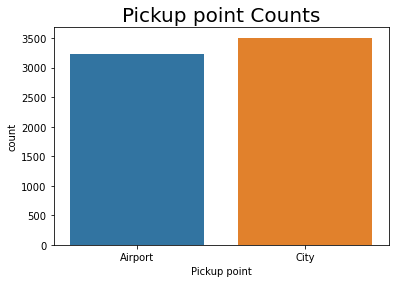

In [32]:
sns.countplot(df["Pickup point"])
plt.title("Pickup point Counts", y=1, fontdict={"fontsize": 20})
plt.show()

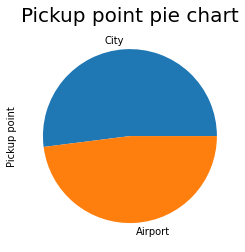

In [33]:
df["Pickup point"].value_counts().plot.pie()
plt.title("Pickup point pie chart", y=1, fontdict={"fontsize": 20})
plt.show()

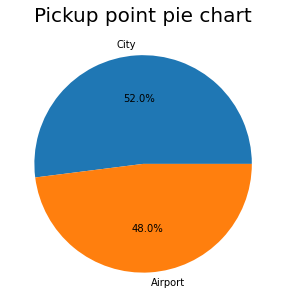

In [34]:
stat=df["Pickup point"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%')
plt.title("Pickup point pie chart", y=1, fontdict={"fontsize": 20})
plt.show() 

### Number of each driver trips

22.00     16
233.00    15
184.00    15
16.00     14
118.00    14
          ..
216.00     5
217.00     5
104.00     5
169.00     5
117.00     4
Name: Driver id, Length: 300, dtype: int64


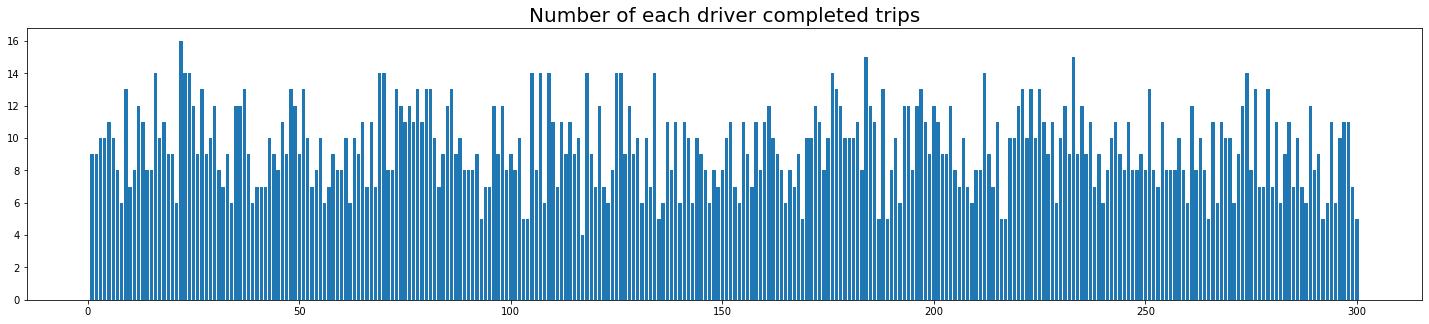

In [35]:
drivers=df['Driver id'][df.Status=="Trip Completed"].value_counts()
print(drivers)
plt.rcParams["figure.figsize"] = (25,5)
plt.bar(drivers.index,drivers)
plt.title("Number of each driver completed trips", y=1, fontdict={"fontsize": 20})
plt.show()

**the most trips was made by driver number 22 with 16 trips and the least trips was made by driver number 117 with 4 trips.**

### Number of each driver cancellations

84.00     12
54.00     11
142.00    10
206.00    10
27.00      9
          ..
188.00     1
91.00      1
156.00     1
162.00     1
123.00     1
Name: Driver id, Length: 295, dtype: int64

 number of drivers with lowest cancellations 15


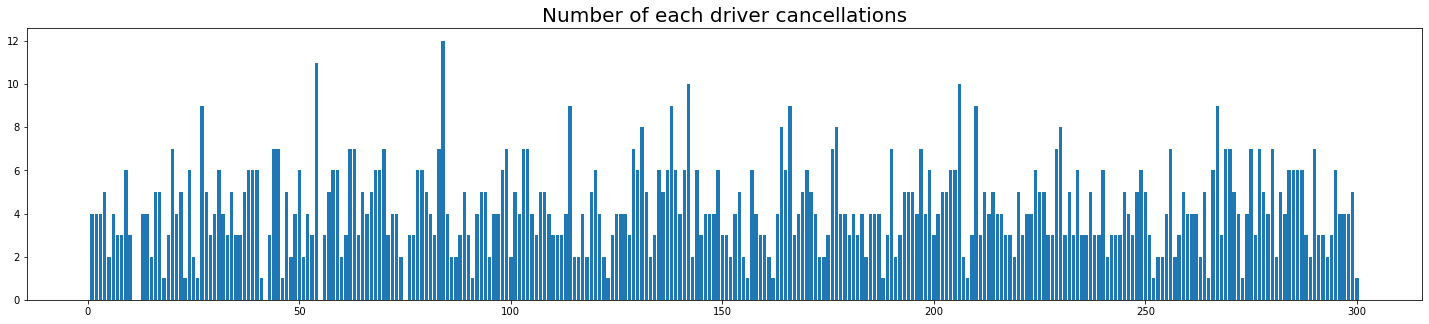

In [36]:
drivers=df['Driver id'][df.Status=="Cancelled"].value_counts()
print(drivers)
print("\n number of drivers with lowest cancellations" ,len(drivers[drivers.values==1]))
plt.rcParams["figure.figsize"] = (25,5)
plt.bar(drivers.index,drivers)
plt.title("Number of each driver cancellations", y=1, fontdict={"fontsize": 20})
plt.show()

**Most trips were canceled by driver number 84 with 12 cancellations.**

In [37]:
drivers[drivers.values>8]

84.00     12
54.00     11
142.00    10
206.00    10
27.00      9
166.00     9
114.00     9
267.00     9
210.00     9
138.00     9
Name: Driver id, dtype: int64

In [38]:
df_drivers=df.groupby(['Driver id',"Status"]).agg({"Status":"count"})
df_drivers

Status
Driver id Status                
1.00      Cancelled            4
          Trip Completed       9
2.00      Cancelled            4
          Trip Completed       9
3.00      Cancelled            4
...                          ...
298.00    Trip Completed      11
299.00    Cancelled            5
          Trip Completed       7
300.00    Cancelled            1
          Trip Completed       5

[595 rows x 1 columns]

In [39]:
df_drivers=df_drivers.unstack()
df_drivers

Status               
Status    Cancelled Trip Completed
Driver id                         
1.00           4.00           9.00
2.00           4.00           9.00
3.00           4.00          10.00
4.00           5.00          10.00
5.00           2.00          11.00
...             ...            ...
296.00         4.00          10.00
297.00         4.00          11.00
298.00         4.00          11.00
299.00         5.00           7.00
300.00         1.00           5.00

[300 rows x 2 columns]

In [40]:
df_drivers.columns

MultiIndex([('Status',      'Cancelled'),
            ('Status', 'Trip Completed')],
           names=[None, 'Status'])

In [41]:
df_drivers["total"]=df_drivers[('Status',      'Cancelled')]+df_drivers[('Status', 'Trip Completed')]

In [42]:
df_drivers

Status                total
Status    Cancelled Trip Completed      
Driver id                               
1.00           4.00           9.00 13.00
2.00           4.00           9.00 13.00
3.00           4.00          10.00 14.00
4.00           5.00          10.00 15.00
5.00           2.00          11.00 13.00
...             ...            ...   ...
296.00         4.00          10.00 14.00
297.00         4.00          11.00 15.00
298.00         4.00          11.00 15.00
299.00         5.00           7.00 12.00
300.00         1.00           5.00  6.00

[300 rows x 3 columns]

### List of divers who canceled their trips more than accepting their trips! 


In [43]:
dr=df_drivers[(df_drivers.iloc[:,0]/df_drivers.iloc[:,1])>1]
dr

Status                total
Status    Cancelled Trip Completed      
Driver id                               
54.00         11.00           8.00 19.00
62.00          7.00           6.00 13.00
84.00         12.00           9.00 21.00
103.00         7.00           5.00 12.00
104.00         7.00           5.00 12.00
131.00         8.00           6.00 14.00
135.00         6.00           5.00 11.00
138.00         9.00           8.00 17.00
166.00         9.00           8.00 17.00
206.00        10.00           7.00 17.00
210.00         9.00           8.00 17.00
229.00         7.00           6.00 13.00
267.00         9.00           6.00 15.00

In [44]:
len(dr)

13

### 1st CONCLUSION & RECOMMENDATION: 

**Of these 300 drivers 13 of them canceled their trips lots of time, hence it is better to not use them anymore or assign a penalty for each cancelation.**


### Status

In [45]:
df["Status"].value_counts()

Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: Status, dtype: int64

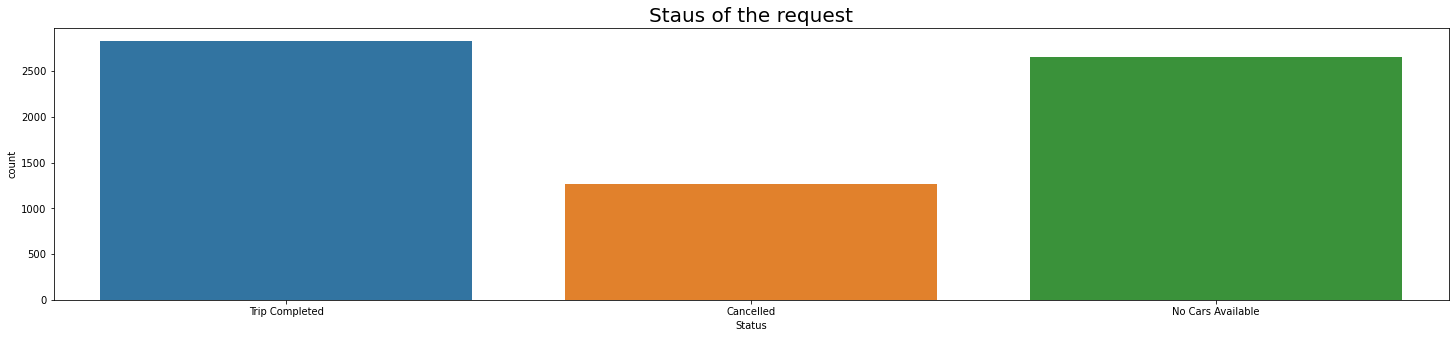

In [46]:
sns.countplot(df["Status"])
plt.title("Staus of the request", y=1, fontdict={"fontsize": 20})
plt.rcParams["figure.figsize"] = (15,5)
plt.show()

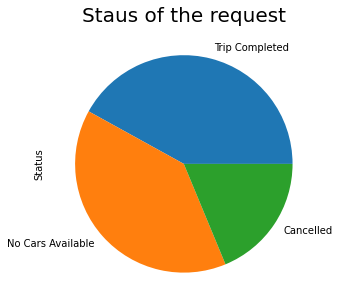

In [47]:
df["Status"].value_counts().plot.pie()
plt.title("Staus of the request", y=1, fontdict={"fontsize": 20})
plt.show()

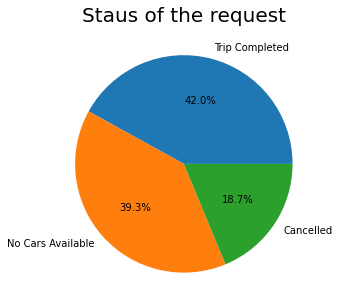

In [48]:
stat=df['Status'].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(stat, labels= stat.index, autopct='%.1f%%')
plt.title("Staus of the request", y=1, fontdict={"fontsize": 20})
plt.show() 

### 2nd conclusion: 

**The most severe problem is shortages of cars. Almost 40% of the time we have a gap between supply and demand. (As you can see, 42% of trips are completed, 39.3% of the time there is no car, and 18.7% of the time the trip is canceled.)**

### Status Vs. Pickup point

In [49]:
#Constructing the Contingency Table 
contingency_table = pd.crosstab(df['Status'],df['Pickup point'],margins = True)
contingency_table

Pickup point,Airport,City,All
Status,,,
Cancelled,198,1066,1264
No Cars Available,1713,937,2650
Trip Completed,1327,1504,2831
All,3238,3507,6745


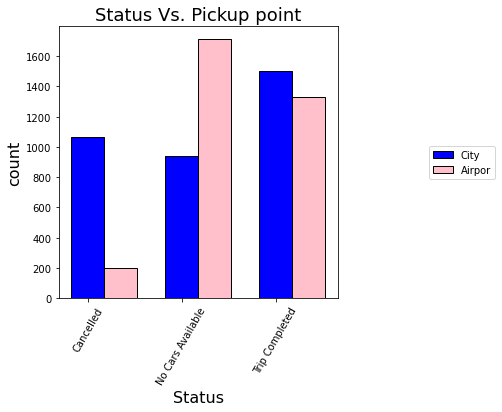

In [50]:
Status=[ 'Cancelled','No Cars Available','Trip Completed']
Pickup_point=['City','Airpor']
pos = np.arange(len(Status))
bar_width = 0.35
Index1=[contingency_table.iloc[0,1],contingency_table.iloc[1,1],contingency_table.iloc[2,1]]
Index2=[contingency_table.iloc[0,0],contingency_table.iloc[1,0],contingency_table.iloc[2,0]]
 
plt.bar(pos,Index1,bar_width,color='blue',edgecolor='black')
plt.bar(pos+bar_width,Index2,bar_width,color='pink',edgecolor='black')
plt.xticks(pos, Status)
plt.xlabel('Status', fontsize=16)
plt.ylabel('count', fontsize=16)
plt.title('Status Vs. Pickup point',fontsize=18)
plt.legend(Pickup_point,loc=6,borderaxespad=37)
plt.xticks(rotation=60)
plt.show()

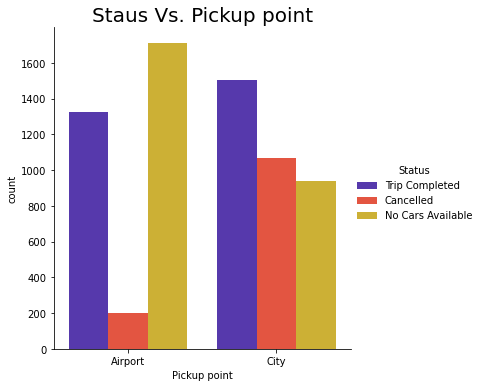

In [51]:
sns.catplot(x="Pickup point", kind="count",hue = 'Status', palette="CMRmap", data=df)
plt.title("Staus Vs. Pickup point", y=1, fontdict={"fontsize": 20})
plt.show()

#### Because these two variables are categoric for test of independency we should conduct Chi_squared test

**The Null and Alternate Hypotheses**

we are interested in knowing if there is a relationship between 'Status' and 'Pickup point'. In order to do so, we would have to use the Chi-squared test. But first, let's state our null hypothesis and the alternative hypothesis.

- H0: There is no statistically significant relationship between 'Status' and 'Pickup point'.

- Ha:There is a statistically significant relationship between 'Status' and 'Pickup point'.


### Chi-squared test of independence

**The Chi-square test statistic can be used if the following conditions are satisfied:**

1.  N, the total frequency, should be reasonably large, say greater than 50.

2. The sample observations should be independent. This implies that no individual item should be included twice or more in the sample.

3. No expected frequencies should be small. Small is a relative term. Preferably each expected frequencies should be larger than 10 but in any case not less than 5.


In [52]:
from scipy.stats import chi2_contingency
def chi_square(c1,c2):
    chi_2, p_val, dof, exp_val = chi2_contingency(pd.crosstab(df[c1],df[c2],margins = False))# make sure margins = False
    print("Expected values: \n")
    print(exp_val)
    #print('\nChi-square is : %f'%chi_2, '\n\np_value is : %f'%p_val, '\n\ndegree of freedom is : %i'%dof)
    print(f'\nChi-square is : {chi_2}', f'\n\np_value is : {p_val}', f'\n\ndegree of freedom is :{dof}')
    if exp_val.min()<10 : print("\n********************************************\nWarning :We have some small expected \
values\n******************************************** ")
    elif p_val < 0.05:# consider significan level is 5%
        print(F"\nThere is a statistically  significant correlation between {c1} and {c2} at a 0.05 significant level")
    else:
        print(F"\nThere is no correlation between the two variables( we don't have enough evidence to conclude there is a statistically significant relationship between {c1} and {c2} at a 5% significant level).")        

In [53]:
chi_square('Status' , 'Pickup point') # you need only check assumption

Expected values: 

[[ 606.79495923  657.20504077]
 [1272.15715345 1377.84284655]
 [1359.04788732 1471.95211268]]

Chi-square is : 824.949934253106 

p_value is : 7.318091810581047e-180 

degree of freedom is :2

There is a statistically  significant correlation between Status and Pickup point at a 0.05 significant level


In [54]:
# comapre expected values with actual values
pd.crosstab(df['Status'],df['Pickup point'])

Pickup point,Airport,City
Status,,
Cancelled,198,1066
No Cars Available,1713,937
Trip Completed,1327,1504


### Canceled trips for different Locations

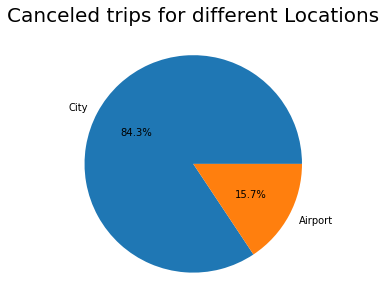

In [55]:
cancel=df['Pickup point'][df.Status=="Cancelled"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(cancel, labels= cancel.index, autopct='%.1f%%')
plt.title("Canceled trips for different Locations", y=1, fontdict={"fontsize": 20})
plt.show()

### No Cars Available for different Locations

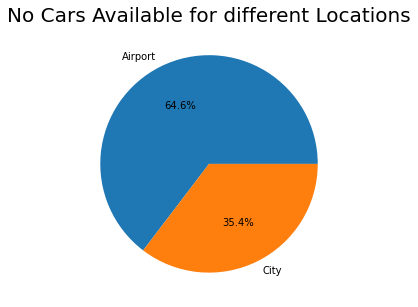

In [56]:
noCar=df['Pickup point'][df.Status=="No Cars Available"].value_counts()
plt.rcParams["figure.figsize"] = (5,5)
plt.pie(noCar, labels= noCar.index, autopct='%.1f%%')
plt.title("No Cars Available for different Locations", y=1, fontdict={"fontsize": 20})
plt.show()

### 3rd conclusion:

There is a statistically significant correlation between Status and Pickup point at a 0.05 significant level: most of the cancelations (84.3%) happened in the City and most of the "no Cars Available" (64.6%) happened at the Airport. That means we have shortages of cars in the airport and shortages of committed drivers in the city.

### Request_day

In [57]:
df["Request_day"].value_counts()

Wednesday    2644
Friday       1381
Monday       1367
Thursday     1353
Name: Request_day, dtype: int64

In [58]:
df["Request_day"].value_counts(normalize=True)

Wednesday   0.39
Friday      0.20
Monday      0.20
Thursday    0.20
Name: Request_day, dtype: float64

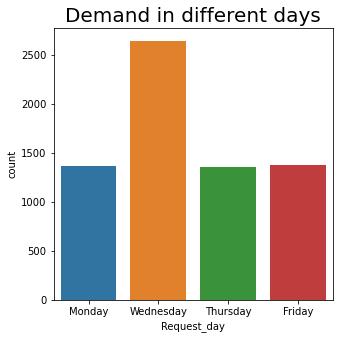

In [59]:
sns.countplot(df["Request_day"])
plt.title("Demand in different days", y=1, fontdict={"fontsize": 20})
plt.show()

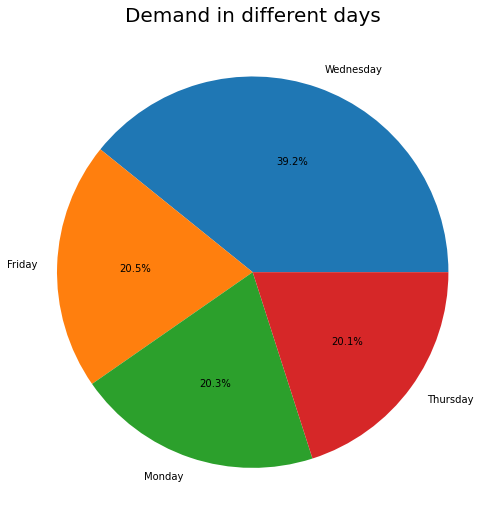

In [60]:
plt.figure(figsize=(12,9))
dayd=df["Request_day"].value_counts()
plt.title("Demand in different days", y=1, fontdict={"fontsize": 20})
plt.pie(dayd, labels= dayd.index, autopct='%.1f%%')
plt.show()

### Status Vs. Request_day

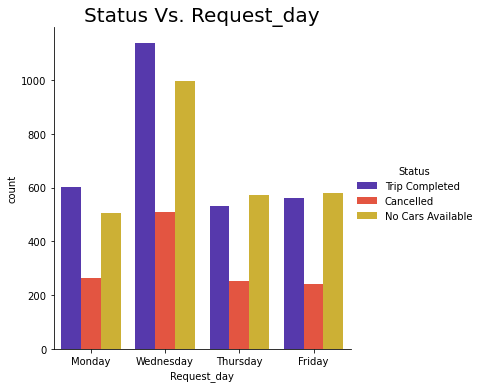

In [61]:
sns.catplot(x="Request_day", kind="count",hue = 'Status', palette="CMRmap", data=df)
plt.title("Status Vs. Request_day", y=1, fontdict={"fontsize": 20})
plt.show()

In [62]:
#Constructing the Contingency Table 
contingency_table = pd.crosstab(df['Status'],df['Request_day'],margins = True)
contingency_table

Request_day,Friday,Monday,Thursday,Wednesday,All
Status,,,,,
Cancelled,240,262,252,510,1264
No Cars Available,580,504,571,995,2650
Trip Completed,561,601,530,1139,2831
All,1381,1367,1353,2644,6745


In [63]:
chi_square('Status' , 'Request_day') # you need only check assumption

Expected values: 

[[ 258.79673832  256.17316531  253.54959229  495.48050408]
 [ 542.57227576  537.07190511  531.57153447 1038.78428466]
 [ 579.63098592  573.75492958  567.87887324 1109.73521127]]

Chi-square is : 16.512043972734897 

p_value is : 0.011254177676166386 

degree of freedom is :6

There is a statistically  significant correlation between Status and Request_day at a 0.05 significant level


### 4th conclusion: 

There is a statistically significant correlation between Status and Request_day at a 0.05 significant level. The demand on Wednesdays is more than Mondays, Thursdays, and Fridays, and we have more shortages and cancelations on Wednesdays comapare with other days, the number of "Cancellation" in wednesday is more than what we expect.

### Canceled trips for Day of the week in different locations

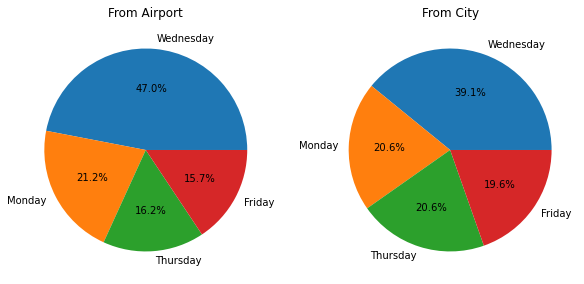

In [64]:
#cancel=df.Request_day[df.Status=="Cancelled"][df["Pickup point"]=="Airport"].value_counts()
#or
cancel=df.Request_day[(df.Status=="Cancelled")&(df["Pickup point"]=="Airport")].value_counts()
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.title("From Airport")
plt.pie(cancel, labels= cancel.index, autopct='%.1f%%')


cancel=df.Request_day[df.Status=="Cancelled"][df["Pickup point"]=="City"].value_counts()
plt.subplot(1, 2, 2)
plt.title("From City")
plt.pie(cancel, labels= cancel.index, autopct='%.1f%%')

plt.show()

### No car Available trips for Day of the week in different locations

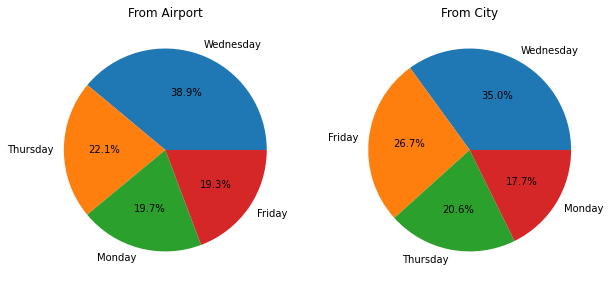

In [65]:
noCar=df.Request_day[(df.Status=="No Cars Available") & (df["Pickup point"]=="Airport")].value_counts()
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.title("From Airport")
plt.pie(noCar, labels= noCar.index, autopct='%.1f%%')

noCar=df.Request_day[df.Status=="No Cars Available"][df["Pickup point"]=="City"].value_counts()
plt.subplot(1, 2, 2) 
plt.title("From City")
plt.pie(noCar, labels= noCar.index, autopct='%.1f%%')

plt.show()

## Request_hour

In [66]:
df["Request_hour"].value_counts()

18    510
20    492
19    473
21    449
5     445
9     431
8     423
17    418
7     406
6     398
22    304
10    243
4     203
23    194
12    184
11    171
15    171
13    160
16    159
14    136
2      99
0      99
3      92
1      85
Name: Request_hour, dtype: int64

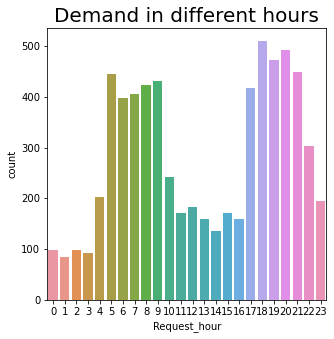

In [67]:
sns.countplot(df["Request_hour"])
plt.title("Demand in different hours", y=1, fontdict={"fontsize": 20})
plt.show()

### 5th conclusion:

We have more demand in the early morning from 4:00 am to 10:00 am and in the late evening from 17:00 p.m to 23:00 pm. 


### Status Vs. Request_hour

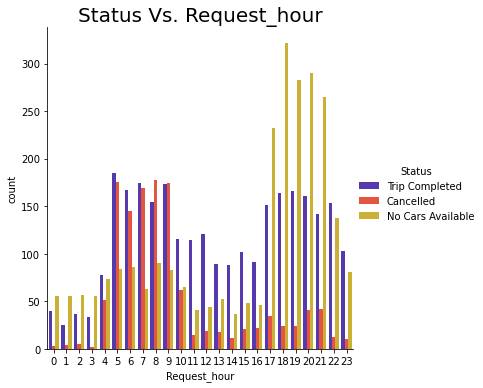

In [68]:
sns.catplot(x="Request_hour", kind="count",hue = 'Status', palette="CMRmap", data=df)
plt.title("Status Vs. Request_hour", y=1, fontdict={"fontsize": 20})
plt.show()

In [69]:
#Constructing the Contingency Table 
contingency_table = pd.crosstab(df['Status'],df['Request_hour'],margins = True)
contingency_table

Request_hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,All
Status,,,,,,,,,,,,,,,,,,,,,
Cancelled,3,4,5,2,51,176,145,169,178,175,...,21,22,35,24,24,41,42,12,10,1264
No Cars Available,56,56,57,56,74,84,86,63,90,83,...,48,46,232,322,283,290,265,138,81,2650
Trip Completed,40,25,37,34,78,185,167,174,155,173,...,102,91,151,164,166,161,142,154,103,2831
All,99,85,99,92,203,445,398,406,423,431,...,171,159,418,510,473,492,449,304,194,6745


In [70]:
chi_square('Status' , 'Request_hour') # you need only check assumption

Expected values: 

[[ 18.55240919  15.92883617  18.55240919  17.24062268  38.04180875
   83.39214233  74.58443291  76.08361749  79.26938473  80.76856931
   45.53773165  32.04507042  34.48124537  29.98369162  25.48613788
   32.04507042  29.79629355  78.33239437  95.57301705  88.63928836
   92.19985174  84.14173462  56.96901408  36.35522609]
 [ 38.89547813  33.39510749  38.89547813  36.14529281  79.75537435
  174.83320979 156.36767976 159.5107487  166.1897702  169.33283914
   95.47071905  67.18309859  72.29058562  62.8613788   53.43217198
   67.18309859  62.46849518 164.22535211 200.37064492 185.83395107
  193.29873981 176.40474426 119.43661972  76.21942179]
 [ 41.55211268  35.67605634  41.55211268  38.61408451  85.2028169
  186.77464789 167.04788732 170.4056338  177.54084507 180.89859155
  101.9915493   71.77183099  77.22816901  67.15492958  57.08169014
   71.77183099  66.73521127 175.44225352 214.05633803 198.52676056
  206.50140845 188.45352113 127.5943662   81.42535211]]

Chi-square 

### 6th conclusion: 

There is a statistically significant correlation between Status and Request_hour at a 0.05 significant level. We have more demand in the morning from 4:00 to 10:00 and in the evening from 17:00 to 23:00. More cancelations happen in the morning from 4:00 to 10:00 and more shortages happen in the evening from 17:00 to 23:00. 


### Canceled trips for Hours of day in different Locations

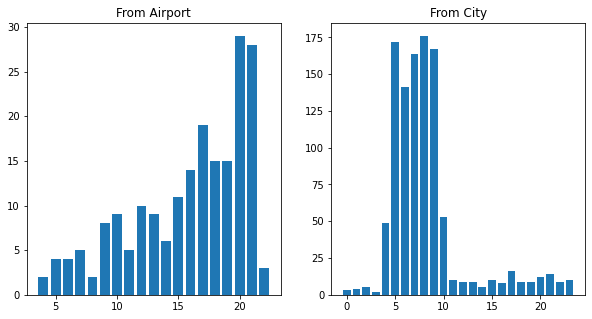

In [71]:
cancel=df.Request_hour[df.Status=="Cancelled"][df["Pickup point"]=="Airport"].value_counts()
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.title("From Airport")
plt.bar(cancel.index,cancel)

cancel=df.Request_hour[df.Status=="Cancelled"][df["Pickup point"]=="City"].value_counts()
plt.subplot(1, 2, 2) 
plt.title("From City")
plt.bar(cancel.index,cancel)

plt.show()

### 7th conclusion: 

In the City more cancelations happen in the morning from 4:00 to 10:00, but in the airport, more cancelations happen in the evening from 20:00 to 21:00. The number of cancelations in the city is much higher than in the airport.

### No car Available trips for Hours of the day and different Locations!

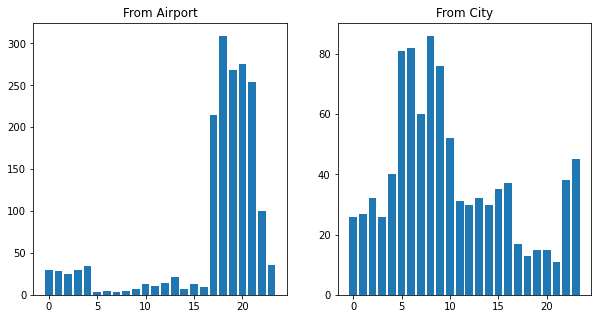

In [72]:
noCar=df.Request_hour[df.Status=="No Cars Available"][df["Pickup point"]=="Airport"].value_counts()
plt.subplots(figsize=(10, 5))
plt.subplot(1, 2, 1) 
plt.title("From Airport")
plt.bar(noCar.index,noCar)

noCar=df.Request_hour[df.Status=="No Cars Available"][df["Pickup point"]=="City"].value_counts()
plt.subplot(1, 2, 2) 
plt.title("From City")
plt.bar(noCar.index,noCar)

plt.show()

### 8th conclusion:

In the City more shortages happen in the morning from 4:00 to 10:00, but in the airport, more shortages happen in the evening from 17:00 to 22:00. The shortage of cars in the airport is much higher than in the city.

In [73]:
df.groupby(["Pickup point","Status"]).agg({"Request_hour":"describe"})

Request_hour                                    \
                                      count  mean  std  min   25%   50%   75%   
Pickup point Status                                                             
Airport      Cancelled               198.00 15.87 4.67 4.00 13.00 17.00 20.00   
             No Cars Available      1713.00 17.37 5.33 0.00 17.00 19.00 20.00   
             Trip Completed         1327.00 13.04 6.43 0.00  7.00 13.00 19.00   
City         Cancelled              1066.00  8.22 4.00 0.00  6.00  7.00  9.00   
             No Cars Available       937.00 10.03 6.18 0.00  6.00  9.00 14.00   
             Trip Completed         1504.00 12.66 6.20 0.00  7.00 12.00 18.00   

                                      
                                 max  
Pickup point Status                   
Airport      Cancelled         22.00  
             No Cars Available 23.00  
             Trip Completed    23.00  
City         Cancelled         23.00  
             No Cars Available 23.00  
             Trip Completed    23.00

In [74]:
pd.set_option("display.max_rows", None)
df_1=df.groupby(["Pickup point","Status","Request_hour"]).agg({"Request_hour":"count"})
df_1

Request_hour
Pickup point Status            Request_hour              
Airport      Cancelled         4                        2
                               5                        4
                               6                        4
                               7                        5
                               8                        2
                               9                        8
                               10                       9
                               11                       5
                               12                      10
                               13                       9
                               14                       6
                               15                      11
                               16                      14
                               17                      19
                               18                      15
                               19                      15
                               20                      29
                               21                      28
                               22                       3
             No Cars Available 0                       30
                               1                       29
                               2                       25
                               3                       30
                               4                       34
                               5                        3
                               6                        4
                               7                        3
                               8                        4
                               9                        7
                               10                      13
                               11                      10
                               12                      14
                               13                      21
                               14                       7
                               15                      13
                               16                       9
                               17                     215
                               18                     309
                               19                     268
                               20                     275
                               21                     254
                               22                     100
                               23                      36
             Trip Completed    0                       23
                               1                       13
                               2                       16
                               3                       15
                               4                       36
                               5                       85
                               6                       81
                               7                       75
                               8                       67
                               9                       74
                               10                      53
                               11                      49
                               12                      63
                               13                      35
                               14                      37
                               15                      52
                               16                      38
                               17                      74
                               18                      81
                               19                      83
                               20                      74
                               21                      61
                               22                      80
                               23                      62
City         Cancelled         0           

## month

In [75]:
df["month"].value_counts()

7     4071
11    1367
12    1307
Name: month, dtype: int64

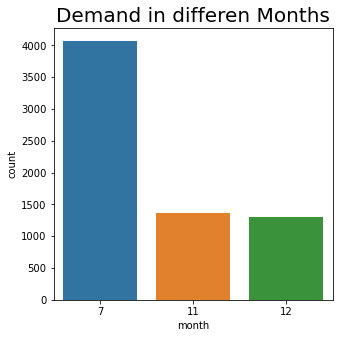

In [76]:
sns.countplot(df["month"])
plt.title("Demand in differen Months", y=1, fontdict={"fontsize": 20})
plt.show()

### Status Vs. month

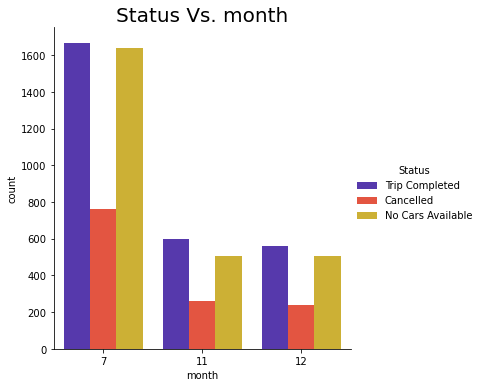

In [77]:
sns.catplot(x="month", kind="count",hue = 'Status', palette="CMRmap", data=df)
plt.title("Status Vs. month", y=1, fontdict={"fontsize": 20})
plt.show()

In [78]:
#Constructing the Contingency Table 
contingency_table = pd.crosstab(df['Status'],df['month'],margins = True)
contingency_table

month,7,11,12,All
Status,,,,
Cancelled,762,262,240,1264
No Cars Available,1641,504,505,2650
Trip Completed,1668,601,562,2831
All,4071,1367,1307,6745


In [79]:
chi_square('Status' , 'month') # you need only check assumption

Expected values: 

[[ 762.89755374  256.17316531  244.92928095]
 [1599.42920682  537.07190511  513.49888807]
 [1708.67323944  573.75492958  548.57183099]]

Chi-square is : 6.081066804420141 

p_value is : 0.1931754011206288 

degree of freedom is :4

There is no correlation between the two variables( we don't have enough evidence to conclude there is a statistically significant relationship between Status and month at a 5% significant level).


### 9th conclusion: 

The demand in July is more than in November and December so we have more shortages in July, but We don't have enough evidence to conclude there is a statistically significant relationship between Status and month at a 5% significant level.

### Request hour Vs. month

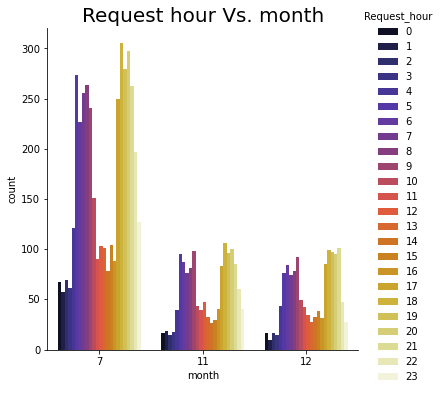

In [80]:
sns.catplot(x="month", kind="count",hue = "Request_hour", palette="CMRmap", data=df)
plt.title("Request hour Vs. month", y=1, fontdict={"fontsize": 20})
plt.show()

In [81]:
#Constructing the Contingency Table 
contingency_table = pd.crosstab(df['month'],df['Request_hour'],margins = True)
contingency_table

Request_hour,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,All
month,,,,,,,,,,,,,,,,,,,,,
7,67,57,69,61,121,274,227,256,264,241,...,104,88,250,305,280,297,263,197,127,4071
11,16,18,14,17,39,95,87,76,81,98,...,29,40,83,106,96,100,85,60,40,1367
12,16,10,16,14,43,76,84,74,78,92,...,38,31,85,99,97,95,101,47,27,1307
All,99,85,99,92,203,445,398,406,423,431,...,171,159,418,510,473,492,449,304,194,6745


In [82]:
chi_square('month' , 'Request_hour') # you need only check assumption

Expected values: 

[[ 59.75226093  51.30244626  59.75226093  55.5273536  122.52231282
  268.58339511 240.21616012 245.04462565 255.3051149  260.13358043
  146.66464047 103.2084507  111.05470719  96.5693106   82.08391401
  103.2084507   95.96575241 252.28732394 307.81467754 285.48302446
  296.9506301  270.99762787 183.48169014 117.0902891 ]
 [ 20.0641957   17.22683469  20.0641957   18.6455152   41.14173462
   90.18754633  80.66212009  82.28346924  85.72883617  87.35018532
   49.24848036  34.65633803  37.29103039  32.42698295  27.56293551
   34.65633803  32.22431431  84.71549296 103.36100815  95.86226835
   99.71297257  90.9982209   61.61126761  39.31771683]
 [ 19.18354337  16.47071905  19.18354337  17.82713121  39.33595256
   86.22905856  77.12171979  78.67190511  81.96604893  83.51623425
   47.08687917  33.13521127  35.65426242  31.00370645  26.35315048
   33.13521127  30.80993328  80.9971831   98.82431431  91.65470719
   95.33639733  87.00415122  58.90704225  37.59199407]]

Chi-square

### 10th conclusion: 

We don't have enough evidence to conclude there is a statistically significant relationship between the month and Request hour at a 5% significant level!

### trip_time

In [83]:
df.trip_time[df.Status=="Trip Completed"].describe()

count    2831.00
mean     3512.31
std      5477.73
min      1247.00
25%      2460.00
50%      3137.00
75%      3840.00
max     84365.00
Name: trip_time, dtype: float64

In [84]:
df.trip_time=df.trip_time/60

In [85]:
df.trip_time[df.Status=="Trip Completed"].describe()

count   2831.00
mean      58.54
std       91.30
min       20.78
25%       41.00
50%       52.28
75%       64.00
max     1406.08
Name: trip_time, dtype: float64

**The average trip time is 58.54 minutes (about 1 hour), max time is 1406.08 minutes (about 1 day)!**

In [86]:
df2=df[df.Status=="Trip Completed"]

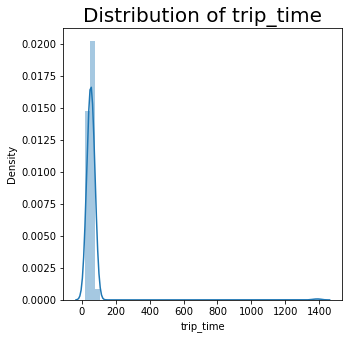

In [87]:
#plot the histogram of trip time variable.
sns.distplot(df2.trip_time)
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

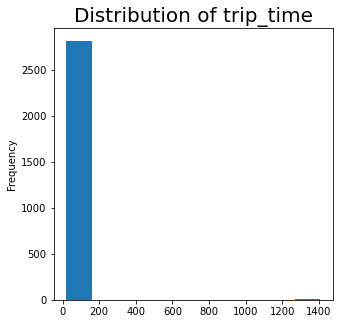

In [88]:
# or
df2.trip_time.plot.hist()
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

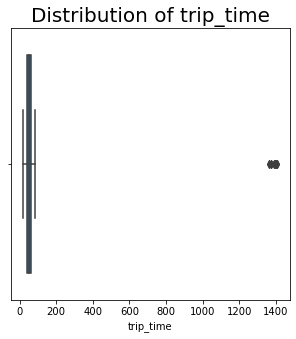

In [89]:
#plot the boxplot of trip time variable.
sns.boxplot(df2.trip_time)
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

In [90]:
df2.trip_time.quantile([0.50,0.70,0.90,0.95,0.99,1])

0.50     52.28
0.70     61.52
0.90     71.87
0.95     74.25
0.99     79.73
1.00   1406.08
Name: trip_time, dtype: float64

As you can see 99th percentile have trip_time less than or equal to 79.73 min and only one percentile have trip_time greater than 79.73 min, and the max is  1406.08 min and which is much higher than 99th percentile, so we have outliers in trip_time.

In [91]:
df2[df2.trip_time>79.73].describe(include='all')

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour,month,trip_time
count,29,29.00,29,29,29,29,29.00,29.00,29.00
unique,2,nan,1,27,29,4,nan,nan,nan
top,Airport,nan,Trip Completed,2016-12-07 23:54:00,2016-07-13 01:10:37,Wednesday,nan,nan,nan
freq,18,nan,29,2,1,19,nan,nan,nan
first,NaN,nan,NaN,2016-07-13 11:10:05,2016-07-13 00:01:12,NaN,nan,nan,nan
last,NaN,nan,NaN,2016-12-07 23:54:00,2016-12-07 22:44:00,NaN,nan,nan,nan
mean,NaN,149.72,NaN,NaN,NaN,NaN,18.34,10.03,666.41
std,NaN,91.59,NaN,NaN,NaN,NaN,6.51,2.43,661.01
min,NaN,15.00,NaN,NaN,NaN,NaN,1.00,7.00,79.77
25%,NaN,59.00,NaN,NaN,NaN,NaN,17.00,7.00,81.00


**Drivers with trips that have trip time more than 79.73 min**

In [92]:
df2["Driver id"][df2.trip_time>79.73].value_counts()

273.00    2
55.00     2
296.00    1
149.00    1
16.00     1
25.00     1
35.00     1
43.00     1
59.00     1
69.00     1
77.00     1
100.00    1
113.00    1
126.00    1
161.00    1
291.00    1
166.00    1
185.00    1
188.00    1
195.00    1
210.00    1
221.00    1
223.00    1
228.00    1
239.00    1
256.00    1
15.00     1
Name: Driver id, dtype: int64

**We have 29 outliers for the trip time that seem they are the wrong data so I will drop them.**

In [93]:
df2=df2[df2.trip_time<=79.73]

In [94]:
df2.describe(include='all')

,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request_day,Request_hour,month,trip_time
count,2802,2802.00,2802,2802,2802,2802,2802.00,2802.00,2802.00
unique,2,nan,1,2558,2571,4,nan,nan,nan
top,City,nan,Trip Completed,2016-11-07 17:57:00,2016-12-07 21:04:00,Wednesday,nan,nan,nan
freq,1493,nan,2802,4,4,1120,nan,nan,nan
first,NaN,nan,NaN,2016-07-13 00:06:34,2016-07-13 00:42:21,NaN,nan,nan,nan
last,NaN,nan,NaN,2016-12-07 22:54:00,2016-12-07 23:45:00,NaN,nan,nan,nan
mean,NaN,148.31,NaN,NaN,NaN,NaN,12.78,8.83,52.25
std,NaN,86.31,NaN,NaN,NaN,NaN,6.28,2.22,13.71
min,NaN,1.00,NaN,NaN,NaN,NaN,0.00,7.00,20.78
25%,NaN,74.00,NaN,NaN,NaN,NaN,7.00,7.00,41.00


In [95]:
df2.trip_time.describe()

count   2802.00
mean      52.25
std       13.71
min       20.78
25%       41.00
50%       52.00
75%       63.80
max       79.63
Name: trip_time, dtype: float64

### 11th conclusion: 

After removing 29 outliers, The average trip time is 52.25 minutes, max time is 79.63 minutes.

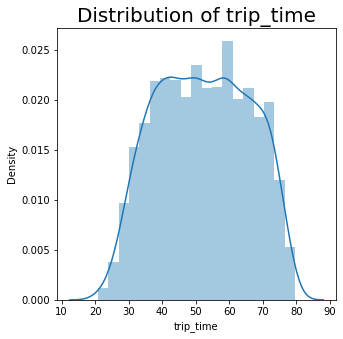

In [103]:
#plot the histogram of trip time variable.
sns.distplot(df2.trip_time)# default:  kde=True
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

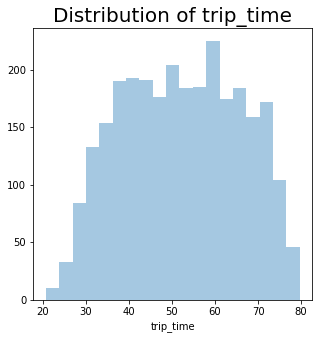

In [102]:
#plot the histogram of trip time variable.
sns.distplot(df2.trip_time, kde=False)
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

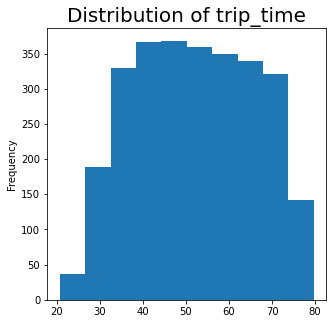

In [97]:
# or
df2.trip_time.plot.hist()
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

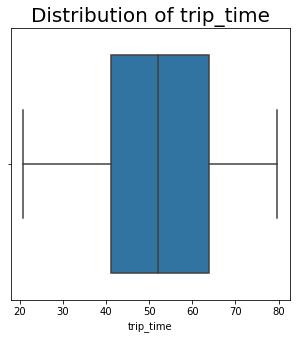

In [98]:
#plot the boxplot of trip time variable.
sns.boxplot(df2.trip_time)
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

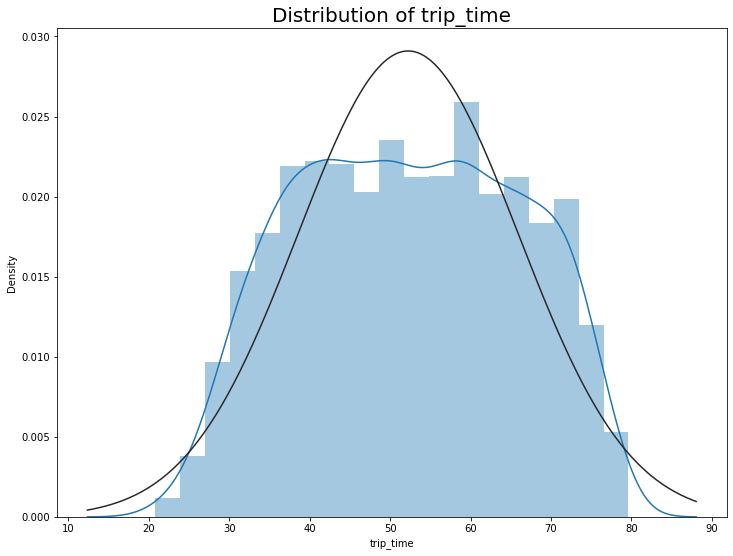

In [99]:
from scipy.stats import norm
plt.figure(figsize=(12,9))
sns.distplot(df2.trip_time, fit= norm)
plt.title("Distribution of trip_time", y=1, fontdict={"fontsize": 20})
plt.show()

In [100]:
#skewness and kurtosis
print("Skewness: %f" % df2.trip_time.skew())
print("Kurtosis: %f" % df2.trip_time.kurt())

Skewness: -0.015313
Kurtosis: -1.025369


In [101]:
from scipy import stats
stats.shapiro(df2.trip_time )

ShapiroResult(statistic=0.9738549590110779, pvalue=3.0140916111364564e-22)

**Perhaps the amount of travel time is related to the amount of traffic at different times.**

### CONCLUSION

 1. Of these 300 drivers 13 of them canceled their trips lots of time, it is better to not use them anymore or assign a penalty for each cancelation.
 
2. The most severe problem is shortages of cars. Almost 40% of the time we have a gap between supply and demand. (As you can see, 42% of trips are completed, 39.3% of the time there is no car, and 18.7% of the time the trip is canceled.)

3. There is a statistically significant correlation between Status and Pickup point at a 0.05 significant level: most of the cancelations (84.3%) happened in the City and most of the "no Cars Available" (64.6%) happened at the Airport. That means we have shortages of cars in the airport and shortages of committed drivers in the city.

4. There is a statistically significant correlation between Status and Request_day at a 0.05 significant level. The demand on Wednesdays is more than Mondays, Thursdays, and Fridays, so we have more shortages and cancelations on Wednesdays.

5. We have more demand in the early morning from 4:00 am to 10:00 am and in the late evening from 17:00 p.m. to 23:00 p.m.

6. There is a statistically significant correlation between Status and Request_hour at a 0.05 significant level. We have more demand in the morning from 4:00 to 10:00 and in the evening from 17:00 to 23:00. More cancelations happen in the morning from 4:00 to 10:00 and more shortages happen in the evening from 17:00 to 23:00. 

7.  In the City more cancelations happen in the morning from 4:00 to 10:00, but in the airport, more cancelations happen in the evening from 20:00 to 21:00. The number of cancelations in the city is much higher than in the airport.

8. In the City more shortages happen in the morning from 4:00 to 10:00, but in the airport, more shortages happen in the evening from 17:00 to 22:00. The shortage of cars in the airport is much higher than in the city.

9. The demand in July is more than in November and December so we have more shortages in July, but We don't have enough evidence to conclude there is a statistically significant relationship between Status and month at a 5% significant level.

10. We don't have enough evidence to conclude there is a statistically significant relationship between the month and Request hour at a 5% significant level. 

11. After removing 29 outliers, The average trip time is 52.25 minutes, max time is 79.63 minutes.





### RECOMMENDATION : 

**As mentioned, there are two major problems with Uber. One is canceling trips by drivers and the other one is not having cars at certain times.**

1.To solve the problem of canceling trips by drivers,

- It is better to not use drivers who canceled their trips more than accepting the trips or assign more penalties for each cancelation.

**It also seems necessary to define an evaluation function for drivers and score them and encourages top drivers. This evaluation function consists of the following 4 parameters:**

- Number of trips completed by each driver
- Number of trips canceled by each driver
- Request time
- Location


**2. Uber can solve this supply-demand gap by providing some incentives to hire more drivers and use incentive schemes during no available car hours like**

- reducing the commission or increasing the price
- some referral fees to motivate them to invite their friends to work at Uber

**3. We need the cancelation timestamp to find if that cancelation happened because of a delay or traffic or not.**

**4. We need the price of trip to find if that cancelation happened because of it is low.**

**5. We need the distance between pick_up point and distinition to find if that cancelation happened because of that.**

**6. We need data from other days and other months to extract more business insights.**



